In [77]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [163]:
def order_book(month,day):
    data = []
    datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/High_Frequency_Trading_Strategy_using_machine_learning/Limit_Order_Book_Best_3/order_book_3_2014'\
                + '_' + str(month) + '_' + str(day) + '.csv'
    order_book = pd.read_csv(datapath,sep=',')#,encoding = 'utf-8')
    bid_price_1 = np.array(map(float,order_book['Bid'][1::4]))/100.0
    bid_price_2 = np.array(map(float,order_book['Bid'][2::4]))/100.0
    bid_price_3 = np.array(map(float,order_book['Bid'][3::4]))/100.0
    timestamp = np.array(order_book['Bid_Quantity'][0::4])
    bid_quantity_1 = np.array(map(float,order_book['Bid_Quantity'][1::4]))
    bid_quantity_2 = np.array(map(float,order_book['Bid_Quantity'][2::4]))
    bid_quantity_3 = np.array(map(float,order_book['Bid_Quantity'][3::4]))
    ask_price_1 = np.array(map(float,order_book['Ask'][1::4]))/100.0
    ask_price_2 = np.array(map(float,order_book['Ask'][2::4]))/100.0
    ask_price_3 = np.array(map(float,order_book['Ask'][3::4]))/100.0
    ask_quantity_1 = np.array(map(float,order_book['Ask_Quantity'][1::4]))
    ask_quantity_2 = np.array(map(float,order_book['Ask_Quantity'][2::4]))
    ask_quantity_3 = np.array(map(float,order_book['Ask_Quantity'][3::4]))
    return timestamp,order_book,bid_price_1,bid_price_2,bid_price_3,bid_quantity_1,\
            bid_quantity_2,bid_quantity_3,ask_price_1,ask_price_2,ask_price_3,ask_quantity_1,\
            ask_quantity_2,ask_quantity_3

In [79]:
def time_transform(timestamp_time):
    time_second_basic = []
    time_second = []
    for i in range(0,len(timestamp_time),1):
        second = float(timestamp_time[i][11])*36000 + float(timestamp_time[i][12])*3600+\
                    float(timestamp_time[i][14])*600 + float(timestamp_time[i][15])*60+\
                    float(timestamp_time[i][17])*10 + float(timestamp_time[i][18])  
        time_second_basic.append(second - 32400.0)
        time_second.append(second)
    return np.array(time_second),np.array(time_second_basic)

In [175]:
time_second,time_second_basic = time_transform(timestamp)

In [164]:
month = 1
day = 2
timestamp,order_book,bid_price_1,bid_price_2,bid_price_3,\
bid_quantity_1,bid_quantity_2,bid_quantity_3,\
ask_price_1,ask_price_2,ask_price_3,ask_quantity_1,\
ask_quantity_2,ask_quantity_3 = order_book(month,day)

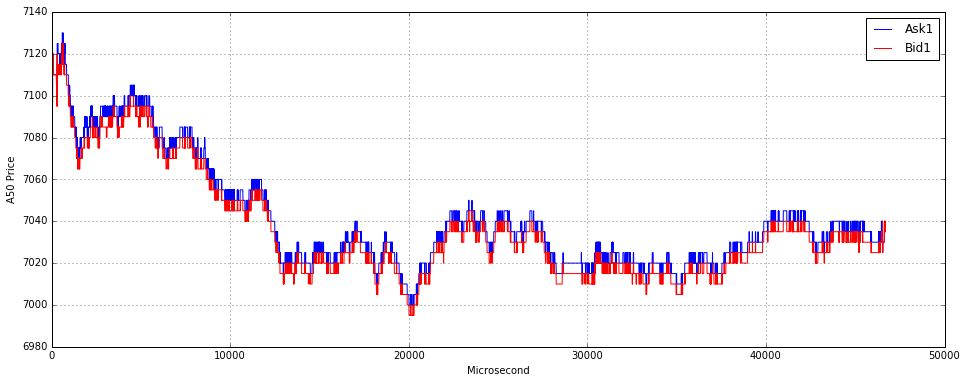

In [174]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,6))
plt.grid()
plot(ask_price_1[2:len(ask_price_1)],label = 'Ask1',color = 'b')
plot(bid_price_1[2:len(ask_price_1)],label = 'Bid1',color = 'r')
plt.ylim(6980,7140)
plt.xlabel("Microsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

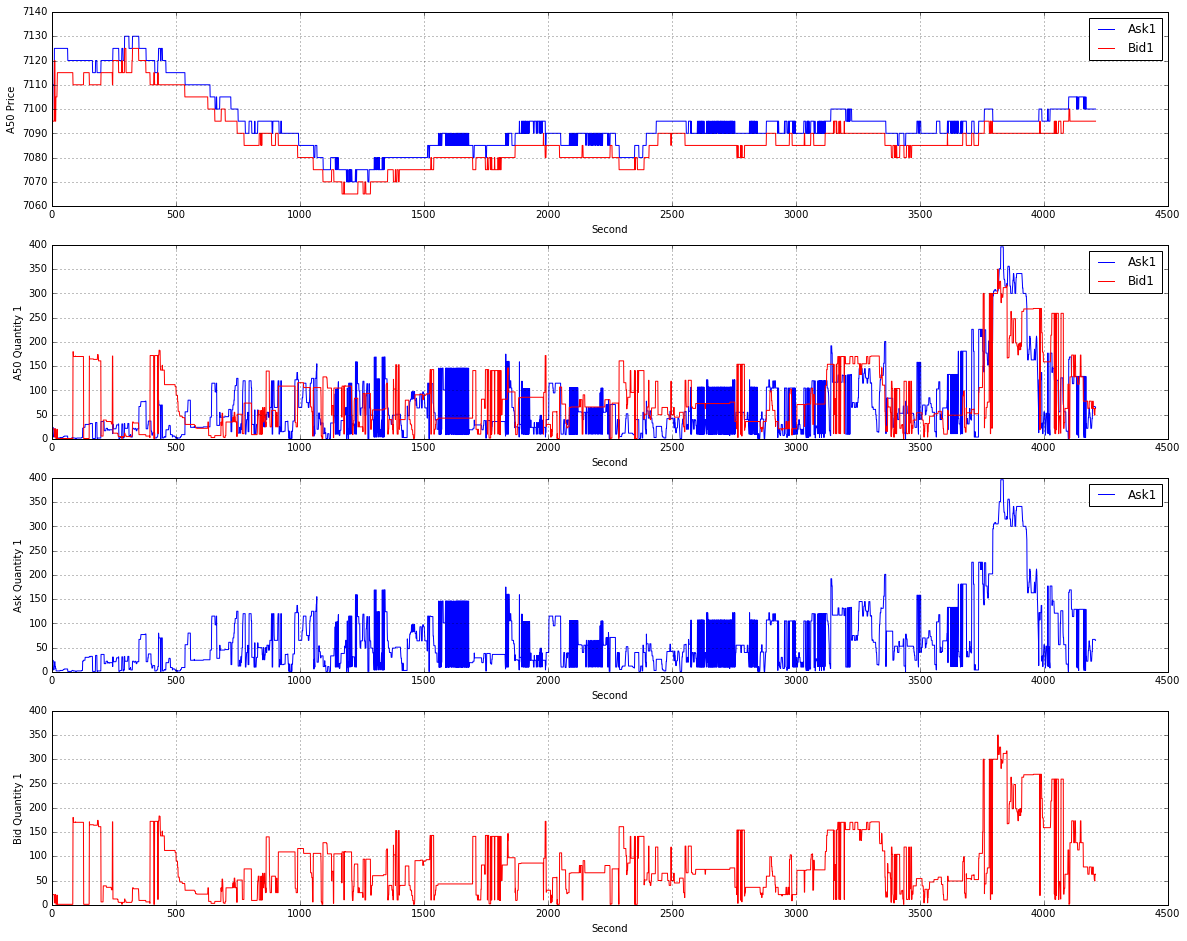

In [281]:
#Open 0 ~ 09:15
time1 = 294
time2 = 4504
plt.figure(figsize = (20,16))
plt.subplot(411)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7060,7140)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(412)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 1")
plt.legend(loc = 1)
plt.subplot(413)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 1")
plt.legend(loc = 1)
plt.subplot(414)
plt.grid()
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 1")

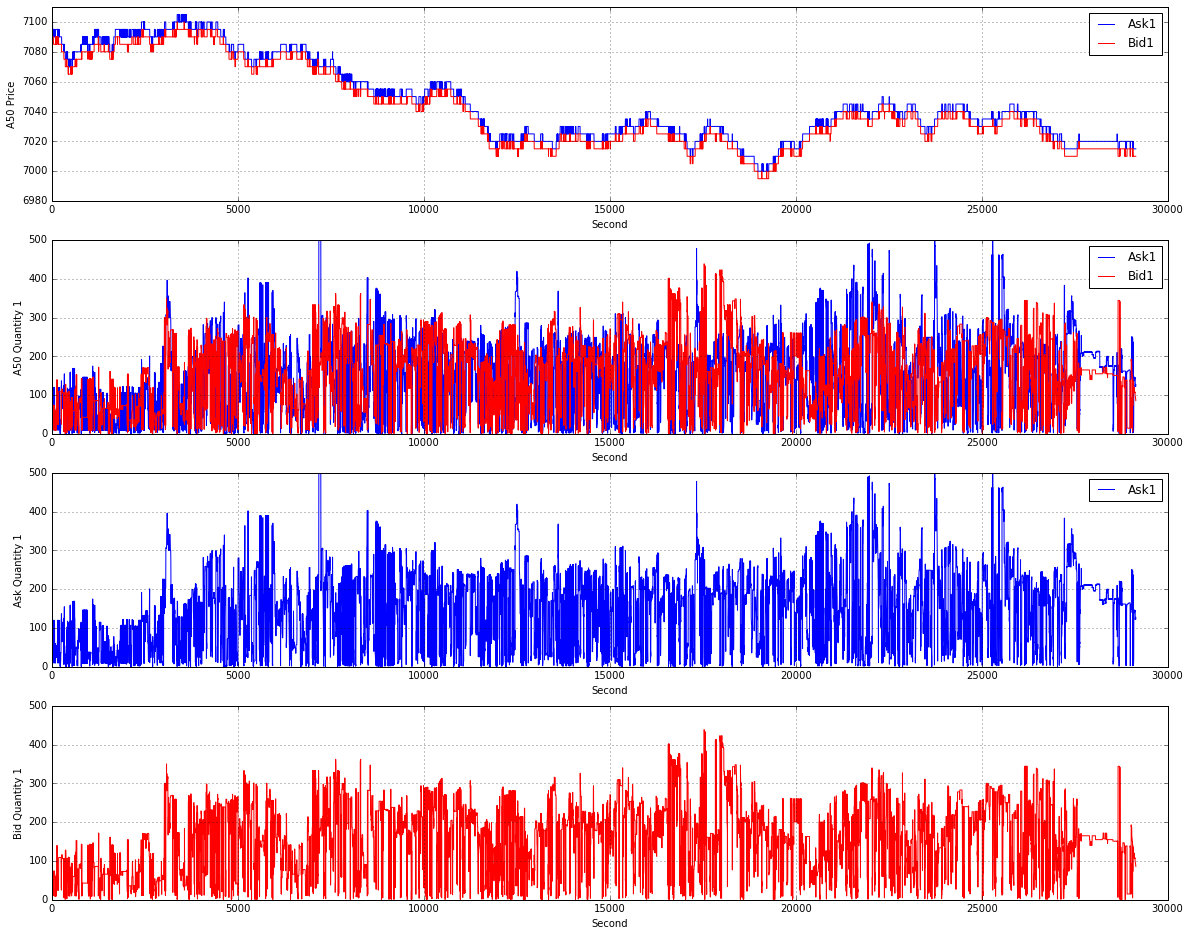

In [286]:
#Open 09:15 ~ 11:30
time1 = 1023
time2 = 30167
plt.figure(figsize = (20,16))
plt.subplot(411)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(6980,7110)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(412)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 1")
plt.legend(loc = 1)
plt.subplot(413)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 1")
plt.legend(loc = 1)
plt.subplot(414)
plt.grid()
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 1")

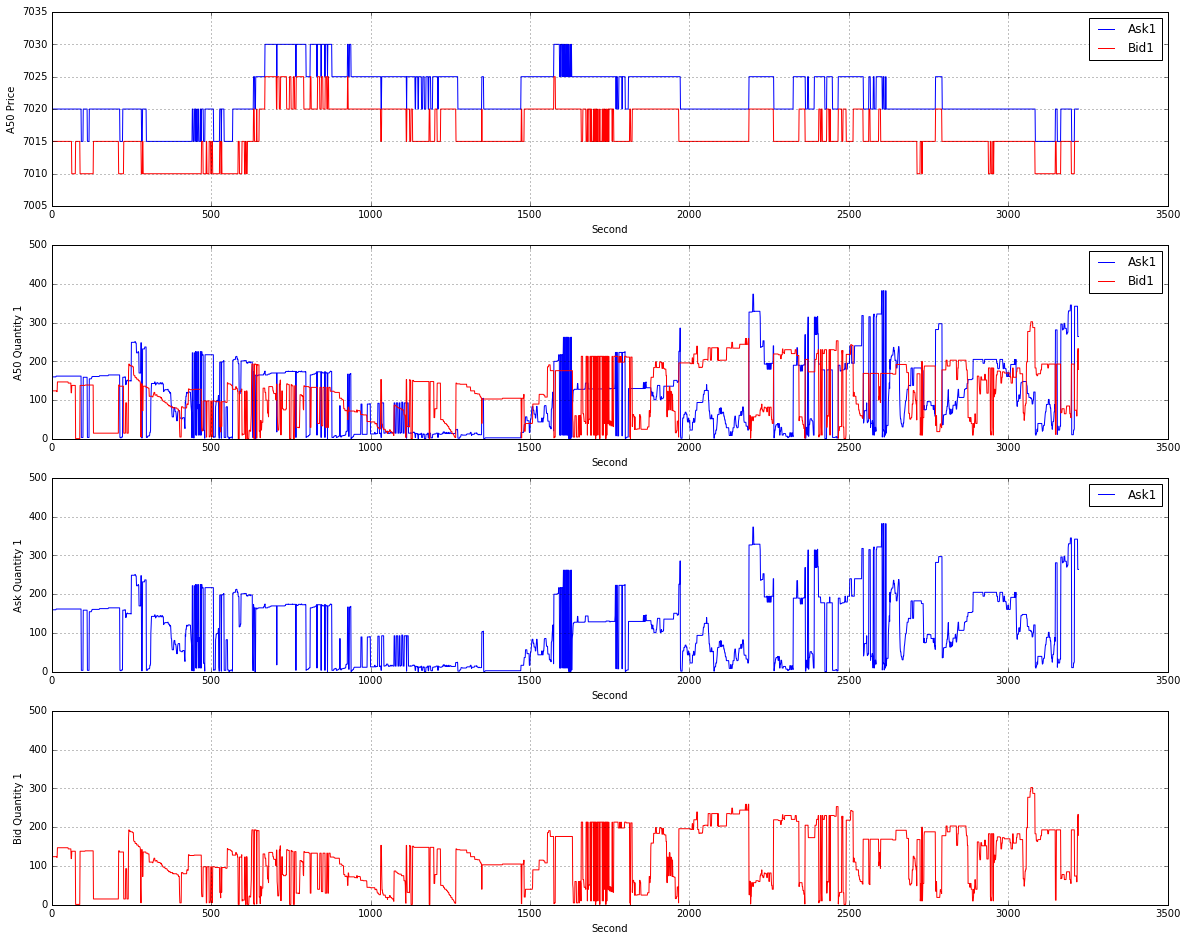

In [296]:
#Open 11:30 ~ 01:00 => china close
time1 = 29799
time2 = 33020
plt.figure(figsize = (20,16))
plt.subplot(411)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7005,7035)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(412)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 1")
plt.legend(loc = 1)
plt.subplot(413)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 1")
plt.legend(loc = 1)
plt.subplot(414)
plt.grid()
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 1")

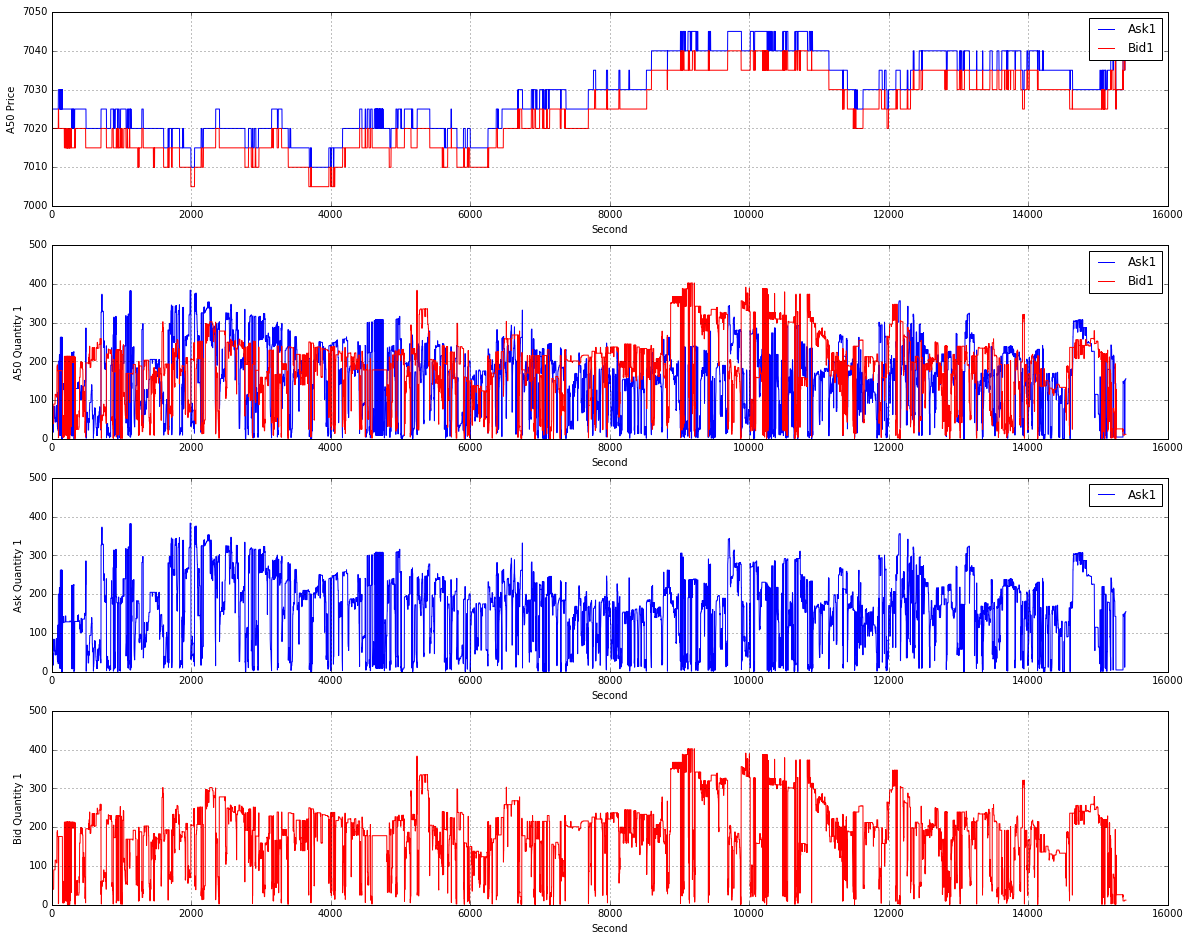

In [298]:
#Open 01:00 ~ 16:00
time1 = 31279
time2 = 46681
plt.figure(figsize = (20,16))
plt.subplot(411)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7000,7050)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(412)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 1")
plt.legend(loc = 1)
plt.subplot(413)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 1")
plt.legend(loc = 1)
plt.subplot(414)
plt.grid()
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 1")

In [290]:
time1 = 14400+1
time2 = 25200
traded = []
for i in range(time1,time2,1):
    index = np.where(time_second_basic <= i)[0][-1]
    if i < 25200 - 900:
        index_15_min = np.where(time_second_basic <= i + 900)[0][-1]
        if bid_price_1[index] > min(ask_price_1[index:index_15_min]):
            traded.append(1)
        else:
            traded.append(0)
    #print index,index_15_min

31279 33025
31279 33028
31289 33028
31290 33029
31299 33029
31304 33029
31305 33030
31306 33036
31309 33036
31320 33040
31320 33042
31328 33044
31338 33046
31339 33051
31339 33052
31339 33054
31340 33055
31344 33057
31344 33058
31344 33061
31345 33063
31346 33067
31353 33067
31357 33067
31358 33067
31364 33067
31364 33067
31364 33068
31365 33068
31365 33069
31365 33069
31365 33076
31371 33079
31371 33081
31371 33081
31371 33081
31371 33081
31381 33083
31383 33085
31383 33093
31385 33093
31385 33093
31386 33096
31386 33097
31386 33097
31386 33099
31386 33100
31387 33101
31387 33102
31391 33103
31391 33103
31391 33103
31391 33103
31399 33103
31404 33106
31412 33108
31413 33110
31413 33110
31424 33110
31432 33110
31444 33110
31446 33110
31449 33110
31452 33110
31458 33110
31458 33115
31468 33116
31472 33119
31474 33121
31477 33124
31483 33128
31484 33129
31484 33130
31484 33132
31484 33132
31484 33132
31484 33132
31485 33132
31486 33132
31487 33132
31487 33132
31487 33132
31487 33132
3148